In [1]:
# Solo monta Drive si estamos en Colab
try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive', force_remount=True)
else:
    print("No Colab: saltando montaje de Drive.")


No Colab: saltando montaje de Drive.


In [2]:
from pathlib import Path
import pandas as pd

CLEAN_PATH = Path("data/processed/clean.csv")
assert CLEAN_PATH.exists(), f"No existe {CLEAN_PATH}. Corre el stage de cleaning primero."
dataset_modified = pd.read_csv(CLEAN_PATH).convert_dtypes()


##Load Libraries

In [3]:
#!pip install scikit-learn==1.5.0

In [4]:
# Parámetros (el runner/papermill los puede sobreescribir si quieres)
PATH_IN = "data/processed/clean.csv"                  # entrada oficial del stage clean
MODEL_OUT = "models/best_model.joblib"                # si dejas un “mejor modelo” único
REPORT_OUT = "reports/models/cv_results_summary.csv"  # resumen de CV
METRICS_OUT = "reports/models/metrics.json"           # métricas para DVC

# Carga de datos
import pandas as pd
from pathlib import Path

Path("models").mkdir(parents=True, exist_ok=True)
Path("reports/models").mkdir(parents=True, exist_ok=True)

if Path(PATH_IN).exists():
    dataset_modified = pd.read_csv(PATH_IN, low_memory=False).convert_dtypes()
elif Path("df_final_validated.csv").exists():  # fallback por si alguien aún lo usa
    dataset_modified = pd.read_csv("df_final_validated.csv", low_memory=False).convert_dtypes()
else:
    raise FileNotFoundError("No se encontró data/processed/clean.csv ni df_final_validated.csv")

print("dataset_modified:", dataset_modified.shape)


dataset_modified: (39235, 62)


In [5]:
# Patched: evitar fallo fuera de Colab
try:
    import google.colab  # type: ignore
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive', force_remount=True)
    print('Google Drive montado (Colab).')
except Exception:
    print('No Colab: saltando montaje de Drive.')


No Colab: saltando montaje de Drive.


## Load data

In [6]:
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/Colab Notebooks/3_Trimestre/MLOps/Semana_4/Tarea')
#os.chdir('/content/drive/MyDrive/Colab Notebooks/MNA/4rto_Trimestre/MLOps/Semana_4/Tarea')

In [7]:
# --- Load data (agnóstico a Colab) ---
from pathlib import Path
import pandas as pd

# (Opcional) Si estás en Colab, monta Drive; en local no hace nada
try:
    import google.colab  # type: ignore
    from google.colab import drive  # type: ignore
    print("Colab detectado -> montando Drive…")
    drive.mount('/content/drive', force_remount=True)
except Exception:
    pass  # no estamos en Colab

# Ruta oficial del pipeline (DVC) y fallback local
CLEAN_PATH = Path("data/processed/clean.csv")
FALLBACK_PATH = Path("df_final_validated.csv")

if CLEAN_PATH.exists():
    dataset_modified = pd.read_csv(CLEAN_PATH, low_memory=False)
    print(f"✓ Cargado {CLEAN_PATH} ->", dataset_modified.shape)
elif FALLBACK_PATH.exists():
    dataset_modified = pd.read_csv(FALLBACK_PATH, low_memory=False)
    print(f"✓ Cargado {FALLBACK_PATH} ->", dataset_modified.shape)
else:
    raise FileNotFoundError(
        "No encuentro data/processed/clean.csv ni df_final_validated.csv.\n"
        "Corre el stage de cleaning (python -m dvc repro) o deja el CSV de respaldo en la raíz."
    )

# Normaliza tipos
dataset_modified = dataset_modified.convert_dtypes()
print("dtypes (primeras 8):")
print(dataset_modified.dtypes.head(8))


✓ Cargado data/processed/clean.csv -> (39235, 62)


dtypes (primeras 8):
url                         string[python]
timedelta                            Int64
n_tokens_title                     Float64
n_tokens_content                   Float64
n_unique_tokens                    Float64
n_non_stop_words                   Float64
n_non_stop_unique_tokens           Float64
num_hrefs                          Float64
dtype: object


In [8]:
#pd.set_option('display.max_rows', None)

In [9]:
dataset_modified=pd.read_csv('df_final_validated.csv',low_memory=False )

In [10]:
dataset_modified=dataset_modified.convert_dtypes()

In [11]:
dataset_modified

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...        731   
1      http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2      http://mashable.com/2013/01/07/apple-40-billio...        731   
3      http://mashable.com/2013/01/07/astronaut-notre...        731   
4       http://mashable.com/2013/01/07/att-u-verse-apps/        731   
...                                                  ...        ...   
39230  http://mashable.com/2014/12/27/samsung-app-aut...          8   
39231  http://mashable.com/2014/12/27/seth-rogen-jame...          8   
39232  http://mashable.com/2014/12/27/son-pays-off-mo...          8   
39233     http://mashable.com/2014/12/27/ukraine-blasts/          8   
39234  http://mashable.com/2014/12/27/youtube-channel...          8   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0          0.57513               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39230       16.575486             346.0         0.529052               1.0   
39231            12.0             328.0         0.696296               1.0   
39232            10.0             442.0         0.516355               1.0   
39233             6.0             682.0         0.539493               1.0   
39234            10.0       1822.919305         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                      0.815385        4.0             2.0       1.0  ...   
1                      0.791946        3.0             1.0       1.0  ...   
2                      0.663866        3.0             1.0       1.0  ...   
3                      0.665635        9.0             0.0       1.0  ...   
4                       0.54089       19.0       12.842425      20.0  ...   
...                         ...        ...             ...       ...  ...   
39230                  0.684783        9.0             7.0       1.0  ...   
39231                  0.885057        9.0             7.0       3.0  ...   
39232                  0.644128       24.0             1.0      12.0  ...   
39233                  0.692661       10.0             1.0       1.0  ...   
39234                  0.846154        1.0             1.0       0.0  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                        0.7                  -0.35                   -0.6   
1                        0.7               -0.11875                 -0.125   
2                        1.0              -0.466667                   -0.8   
3                        0.8              -0.369697                   -0.6   
4                        1.0              -0.220192                   -0.5   
...                      ...                    ...                    ...   
39230                   0.75                  -0.26                   -0.5   
39231                    0.7              -0.211111                   -0.4   
39232                    0.5              -0.356439                   -0.8   
39233                    0.5              -0.253332                   -0.5   
39234                    0.5                   -0.2                   -0.2   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                       -0.1                 0.5                   -0.1875   
1                       -0.1                 0.0                       0.0   
2                  -0.133333                 0.0                       0.0   
3                  -0.166667                 0.0                       0.0   
4          

In [12]:
print(dataset_modified.dtypes)

url                             string[python]
timedelta                                Int64
n_tokens_title                         Float64
n_tokens_content                       Float64
n_unique_tokens                        Float64
                                     ...      
title_sentiment_polarity               Float64
abs_title_subjectivity                 Float64
abs_title_sentiment_polarity           Float64
shares                                 Float64
mixed_type_col                           Int64
Length: 62, dtype: object


## Step 1 EDA - Clean Dataframe and describe columns

###Classes and functions to clean columns and insert into pipeline

In [13]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


In [14]:
class CleanNumericColumns(BaseEstimator, TransformerMixin):
    """
    1. Lower-cases + trims selected columns
    2. Casts to numeric (non-parsable values → NaN)
    3. Imputes NaN with the training-set median
    """
    def __init__(self, columns=None):
        """
        columns : list of column names to clean; if None, all columns
        """
        self.columns = columns              # hyper-parameter (used by __init__)

    # ----------- Fit -----------
    def fit(self, X, y=None):
        X_ = X.copy()
        cols = self.columns or X_.columns   # default: every column

        self.medians_ = {}                  # learned parameter(s) end with "_"
        for c in cols:
            col_clean = (
                X_[c].astype(str)
                    .str.lower()
                    .str.strip()
                    .pipe(pd.to_numeric, errors='coerce')
            )
            self.medians_[c] = col_clean.median()
        self.cols_ = cols                   # save for use in transform
        return self                         # always return self

    # ----------- Transform -----------
    def transform(self, X):
        X = X.copy()
        for c in self.cols_:
            X[c] = (
                X[c].astype(str)
                    .str.lower()
                    .str.strip()
                    .pipe(pd.to_numeric, errors='coerce')
                    .fillna(self.medians_[c])
            )
        return X

    def get_feature_names_out(self, input_features=None):
        return np.array(self.cols_)

In [15]:
class CleanBooleanColumns(BaseEstimator, TransformerMixin):
    """
    1. Lower-cases + trims selected columns
    2. Casts to numeric; NaN if coercion fails
    3. Imputes NaN with the mode (most frequent) value from the *training* data
    4. Converts to strict 0/1 flag based on equality with 1
    """
    def __init__(self, columns=None):
        self.columns = columns          # list of columns (or None = all)

    # ---------------- fit ----------------
    def fit(self, X, y=None):
        X_ = X.copy()
        cols = self.columns or X_.columns
        self.modes_ = {}

        for c in cols:
            col_clean = (
                X_[c].astype(str)
                    .str.lower()
                    .str.strip()
                    .pipe(pd.to_numeric, errors='coerce')
            )
            # .mode() returns Series; take the first element
            self.modes_[c] = col_clean.mode(dropna=True)[0]

        self.cols_ = cols
        return self

    # ------------- transform -------------
    def transform(self, X):
        X = X.copy()
        for c in self.cols_:
            X[c] = (
                X[c].astype(str)
                    .str.lower()
                    .str.strip()
                    .pipe(pd.to_numeric, errors='coerce')
                    .fillna(self.modes_[c])
                    .isin([1])          # True if value == 1
                    .astype(int)        # → 0/1 integer
            )
        return X

    # (Optional) expose feature names so ColumnTransformer → OneHotEncoder pipelines work
    def get_feature_names_out(self, input_features=None):
        return np.array(self.cols_)

In [16]:
def _clean_string_columns(X, columns):
    """
    • Cast to string
    • Lower-case + strip
    • Keep value only if it starts with 'http', else set to <NA>

    Parameters
    ----------
    X : pandas DataFrame
    columns : list[str] – columns to clean (must exist in X)

    Returns
    -------
    X_new : pandas DataFrame (copy of X with cleaned columns)
    """
    X = X.copy()
    for c in columns:
        X[c] = (
            X[c].astype(str)
                 .str.lower()
                 .str.strip()
                 .where(lambda s: s.str.startswith('http'), pd.NA)
        )
    return X

In [17]:
class CleanStringColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        # stateless – nothing to learn
        self.cols_ = self.columns or X.columns.tolist()
        return self

    def transform(self, X):
        return _clean_string_columns(X, self.cols_)

    def get_feature_names_out(self, input_features=None):
        return np.array(self.cols_)

In [18]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer


In [19]:

def _drop_rows_where_url_is_nan(X):
    """Return a copy of X with rows removed if url is missing (<NA>)."""
    return X.loc[X['url'].notna()].reset_index(drop=True)

drop_bad_url = FunctionTransformer(
    _drop_rows_where_url_is_nan,
    feature_names_out='one-to-one'   # keeps column names unchanged
)

def _drop_duplicate_url(X):
    return X.drop_duplicates(subset='url', keep='first').reset_index(drop=True)

drop_dup_url = FunctionTransformer(_drop_duplicate_url,
                                   feature_names_out='one-to-one')

In [20]:
def delete_outliers(
        df,
        k=1.5,          # IQR multiplier
        max_cols=1,     # row dropped if > max_cols columns flag it
        return_counts=False
    ):
    num_cols = df.select_dtypes(include=[np.number]).columns
    col_counts = {}

    mask_df = pd.DataFrame(index=df.index, columns=num_cols, dtype=bool)

    for col in num_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - k*iqr, q3 + k*iqr
        col_mask = (df[col] < lower) | (df[col] > upper)

        mask_df[col] = col_mask
        col_counts[col] = int(col_mask.sum())

    row_counts = mask_df.sum(axis=1)
    row_mask   = row_counts > max_cols

    cleaned_df = df.loc[~row_mask].reset_index(drop=True)

    if return_counts:
        return cleaned_df, pd.Series(col_counts).sort_values(ascending=False)
    return cleaned_df

def _drop_outliers(X):
    # delete_outliers returns only the cleaned df when return_counts=False
    return delete_outliers(X, k=1.5, max_cols=10, return_counts=False)

drop_outliers = FunctionTransformer(_drop_outliers,
                                    feature_names_out='one-to-one')


In [21]:
def clip_numeric_ranges(X):
    X = X.copy()
    for c in columns_0_to_1:
        if c in X.columns:
            X[c] = pd.to_numeric(X[c], errors='coerce').clip(0, 1)
    for c in columns_neg1_to_1:
        if c in X.columns:
            X[c] = pd.to_numeric(X[c], errors='coerce').clip(-1, 1)
    for c in columns_neg1_to_0:
        if c in X.columns:
            X[c] = pd.to_numeric(X[c], errors='coerce').clip(-1, 0)
    return X

clip_ranges = FunctionTransformer(clip_numeric_ranges,
                                  feature_names_out='one-to-one')

### Define column type

In [22]:
string_columns=['url']
bool_columns=['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday','is_weekend']
num_columns=['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03','LDA_04', 'abs_title_sentiment_polarity', 'abs_title_subjectivity', 'average_token_length', 'avg_negative_polarity', 'avg_positive_polarity', 'global_rate_negative_words', 'global_rate_positive_words', 'global_sentiment_polarity', 'global_subjectivity', 'kw_avg_avg', 'kw_avg_max', 'kw_avg_min', 'kw_max_avg', 'kw_max_max', 'kw_max_min', 'kw_min_avg', 'kw_min_max', 'kw_min_min', 'max_negative_polarity', 'max_positive_polarity', 'min_negative_polarity', 'min_positive_polarity', 'mixed_type_col', 'n_non_stop_unique_tokens', 'n_non_stop_words', 'n_tokens_content', 'n_tokens_title', 'n_unique_tokens', 'num_hrefs', 'num_imgs', 'num_keywords', 'num_self_hrefs', 'num_videos', 'rate_negative_words', 'rate_positive_words', 'timedelta', 'title_sentiment_polarity', 'title_subjectivity','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','shares']

In [23]:
len(string_columns),len(bool_columns),len(num_columns)

(1, 14, 47)

### Classify numeric columns

In [24]:
# Clip values to match original dataset range
columns_0_to_1 = ["n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens",
           "LDA_00","LDA_01","LDA_02","LDA_03","LDA_04","global_rate_positive_words",
           "global_subjectivity","global_rate_negative_words",
           "rate_positive_words","rate_negative_words","avg_positive_polarity","min_positive_polarity","max_positive_polarity"
           "title_subjectivity","abs_title_subjectivity","abs_title_sentiment_polarity"]

columns_neg1_to_1 = ["global_sentiment_polarity","title_sentiment_polarity"]

columns_neg1_to_0 = ["max_negative_polarity", "avg_negative_polarity","min_negative_polarity"]

In [25]:
len(columns_0_to_1),len(columns_neg1_to_1),len(columns_neg1_to_0)

(18, 2, 3)

### Preprocess columns

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [27]:
preprocess = ColumnTransformer(
    transformers=[
        ('num' , CleanNumericColumns(num_columns) ,  num_columns),
        ('bool', CleanBooleanColumns(bool_columns),  bool_columns),
        ('str' , CleanStringColumns(string_columns), string_columns),
    ],
    remainder='drop',                # keep only the columns above
    verbose_feature_names_out=False
).set_output(transform='pandas')     # ← keep pandas DataFrame & names


In [28]:
cleaning_pipe = Pipeline([
    ('prep', preprocess),
 #   ('drop_bad_url', drop_bad_url),
 #   ('drop_dup_url',  drop_dup_url),
 #   ('drop_outliers',  drop_outliers),
 #   ('clip_ranges',    clip_ranges)
])


In [29]:
# Fit *once* on your full DataFrame (no y needed)
cleaned_df = cleaning_pipe.fit_transform(dataset_modified)

In [30]:
print("Original shape :", dataset_modified.shape)
print("Cleaned shape  :", cleaned_df.shape)
print("Any NA in url? :", cleaned_df['url'].isna().any())
print("Duplicate urls :", cleaned_df['url'].duplicated().any())

Original shape : (39235, 62)
Cleaned shape  : (39235, 62)
Any NA in url? : False
Duplicate urls : False


### Describe the columns

In [31]:
cleaned_df.dtypes

LDA_00                 float64
LDA_01                 float64
LDA_02                 float64
LDA_03                 float64
LDA_04                 float64
                        ...   
weekday_is_friday        int64
weekday_is_saturday      int64
weekday_is_sunday        int64
is_weekend               int64
url                     object
Length: 62, dtype: object

In [32]:
cleaned_df.describe(include='all').T

count unique  \
LDA_00               39235.0    NaN   
LDA_01               39235.0    NaN   
LDA_02               39235.0    NaN   
LDA_03               39235.0    NaN   
LDA_04               39235.0    NaN   
...                      ...    ...   
weekday_is_friday    39235.0    NaN   
weekday_is_saturday  39235.0    NaN   
weekday_is_sunday    39235.0    NaN   
is_weekend           39235.0    NaN   
url                    39235  39235   

                                                                   top freq  \
LDA_00                                                             NaN  NaN   
LDA_01                                                             NaN  NaN   
LDA_02                                                             NaN  NaN   
LDA_03                                                             NaN  NaN   
LDA_04                                                             NaN  NaN   
...                                                                ...  ...   
weekday_is_friday                                                  NaN  NaN   
weekday_is_saturday                                                NaN  NaN   
weekday_is_sunday                                                  NaN  NaN   
is_weekend                                                         NaN  NaN   
url                  http://mashable.com/2013/01/07/amazon-instant-...    1   

                         mean       std       min       25%       50%  \
LDA_00                 0.1844  0.261623  0.010289  0.025182  0.033402   
LDA_01               0.142881  0.220038   0.01029  0.025032  0.033348   
LDA_02               0.215967   0.28094  0.010005  0.028572  0.040007   
LDA_03               0.222839  0.293553  0.010838  0.028572  0.040001   
LDA_04               0.233914   0.28832  0.010679   0.02858  0.047619   
...                       ...       ...       ...       ...       ...   
weekday_is_friday    0.140232  0.347232       0.0       0.0       0.0   
weekday_is_saturday  0.060176  0.237815       0.0       0.0       0.0   
weekday_is_sunday     0.06721  0.250389       0.0       0.0       0.0   
is_weekend           0.127386  0.333409       0.0       0.0       0.0   
url                       NaN       NaN       NaN       NaN       NaN   

                          75%       max  
LDA_00               0.240389  0.926994  
LDA_01               0.156095  0.925947  
LDA_02               0.327956  0.919999  
LDA_03               0.366368  0.926534  
LDA_04               0.396494  0.927191  
...                       ...       ...  
weekday_is_friday         0.0       1.0  
weekday_is_saturday       0.0       1.0  
weekday_is_sunday         0.0       1.0  
is_weekend                0.0       1.0  
url                       NaN       NaN  

[62 rows x 11 columns]

## Step 2 EDA - graphs

### Function to graph

In [33]:
def graph_features(df,num_columns,bool_columns):
  # ───────────────────────────────────────────────────────────
  # 1.  Decide how many plots we need
  # ───────────────────────────────────────────────────────────
  n_plots = len(num_columns) * 2 + len(bool_columns)   # 2 plots per numeric feature

  # choose grid size automatically (≤4 columns usually looks good)
  n_cols  = 4
  n_rows  = math.ceil(n_plots / n_cols)

  # ───────────────────────────────────────────────────────────
  # 2.  Create the figure canvas
  # ───────────────────────────────────────────────────────────
  fig, axes = plt.subplots(n_rows, n_cols,
                          figsize=(n_cols * 4, n_rows * 3),
                          constrained_layout=True)      # auto-spacing
  axes = axes.ravel()        # 1-D iterator over all axes

  # ───────────────────────────────────────────────────────────
  # 3.  Draw the plots
  # ───────────────────────────────────────────────────────────
  idx = 0
  BINS=60
  # Numeric: histogram + boxplot
  for col in num_columns:
      # Histogram (+ optional KDE line)
      sns.histplot(df[col],
                  bins=BINS,
                  ax=axes[idx],
                  kde=True, color='steelblue')
      axes[idx].set_title(f'{col}\nHistogram', fontsize=9)
      idx += 1

      # Boxplot (vertical wastes less horizontal space)
      sns.boxplot(y=df[col],
                  ax=axes[idx],
                  color='salmon')
      axes[idx].set_title(f'{col}\nBoxplot', fontsize=9)
      idx += 1

  # Boolean / nominal: countplot
  for col in bool_columns:
      sns.countplot(x=df[col],
                    ax=axes[idx],
                    palette='pastel')
      axes[idx].set_title(f'{col}\nCount', fontsize=9)
      idx += 1

  # ───────────────────────────────────────────────────────────
  # 4.  Remove any unused axes to keep the grid tidy
  # ───────────────────────────────────────────────────────────
  for j in range(idx, len(axes)):
      fig.delaxes(axes[j])

  # Global style tweaks
  sns.despine(fig=fig)           # remove top/right spines
  plt.show()

In [34]:
import math
import matplotlib.pyplot as plt
import seaborn as sns



/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],


/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],


/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],


/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],
/tmp/ipykernel_227439/1188193524.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],


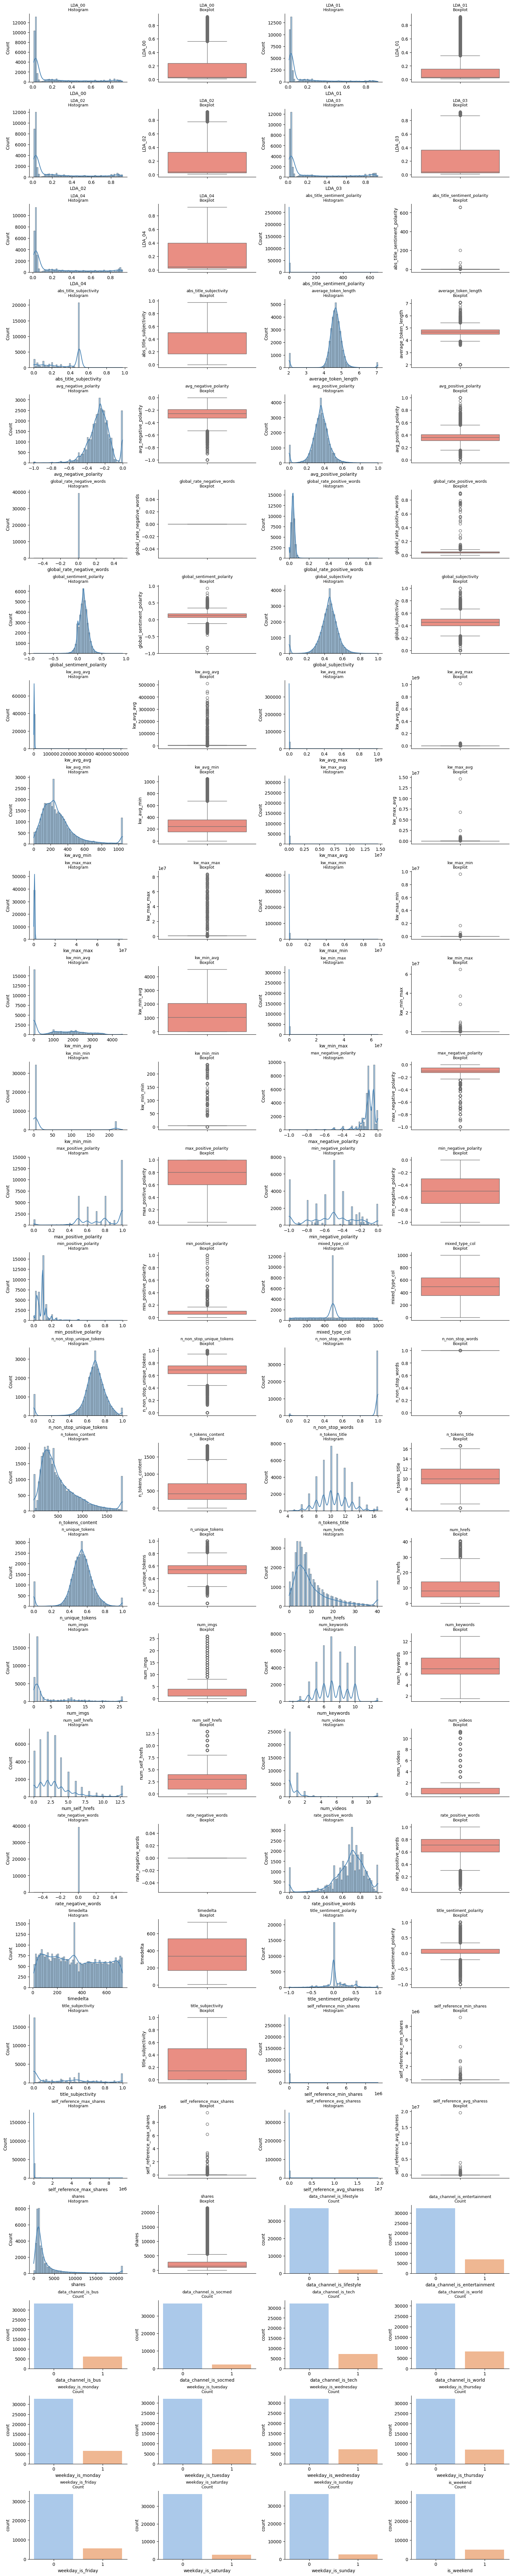

In [35]:
graph_features(df=cleaned_df,num_columns=num_columns,bool_columns=bool_columns)

## ML model

### Split dataframe for Train, Validation and Test and drop columns that are redundant

### Agregar analisis de correlacion

In [36]:
corr_matrix = cleaned_df.corr(numeric_only=True)

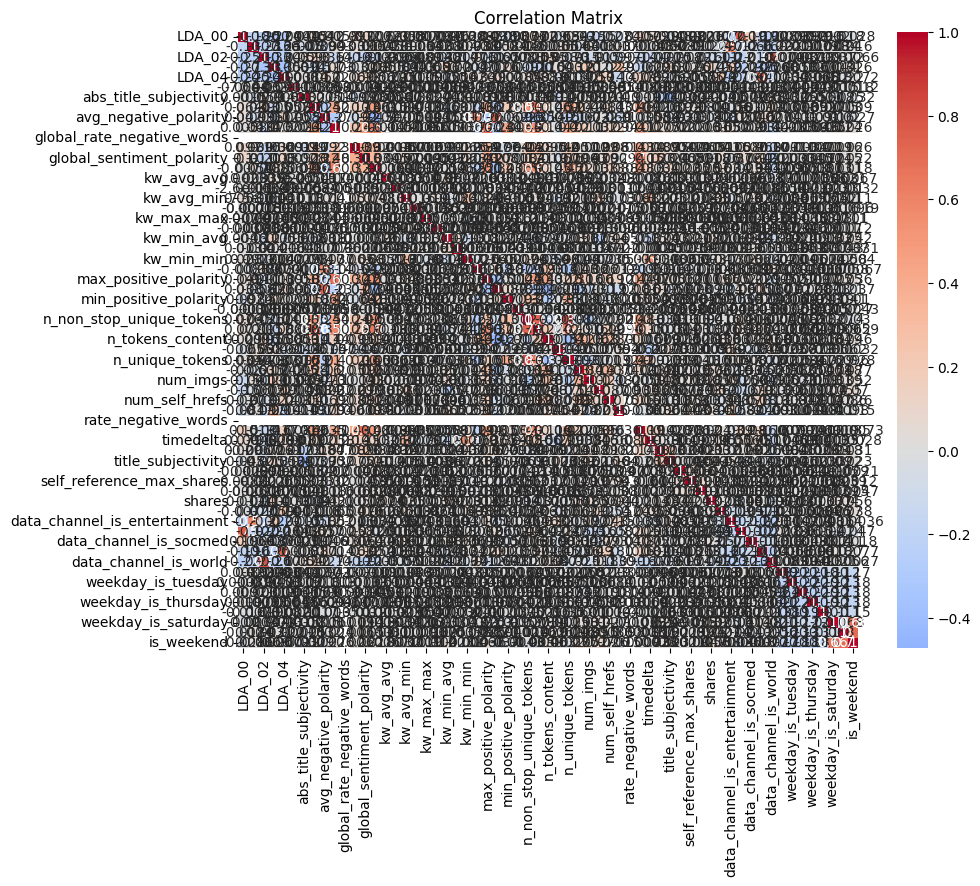

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

##### The following columns where removed from the X



1.   average_token_length since it is an average correlated to n_tokens_content
2.   kw_avg_min since it is an average correlated to kw_min_min and kw_max_min
3.   kw_avg_max since it is an average correlated to kw_max_min and kw_max_max
4.   self_reference_min_shares since it is normally data obtained after models have been deployed
5.   self_reference_max_shares since it is normally data obtained after models have been deployed
6.   self_reference_avg_sharess since it is normally data obtained after models have been deployed
7.   is_weekend since we have columns for saturday and sunday
8.   weekday_is_sunday since we can determine by knowing if the other days did not apply
9.  avg_positive_polarity since it is an abg correlated to min_positive_polarity and max_positive_polarity
10.  avg_negative_polarity since it is an abg correlated to min_negative_polarity and max_negative_polarity
11. url since it is a string column that can be used as the index
12. shares since that is our output
13. kw_avg_avg since it is correlated to kw_max_avg and kw_min_avg
14. timedelta since it is a not predictive column







In [38]:
#Dataframe for X
index = dataset_modified["url"]
y = cleaned_df["shares"]
X=cleaned_df.drop(columns={'timedelta','average_token_length','kw_avg_min','kw_avg_max','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','is_weekend','weekday_is_sunday','avg_positive_polarity','avg_negative_polarity','url','shares','kw_avg_avg'})

In [39]:
# Imports mínimos para el split y métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# (opcional) por si el kernel se reinició
import warnings
warnings.filterwarnings("ignore")


In [40]:
X_train, X_valtest, y_train, y_valtest = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=None
)

X_val, X_test, y_val, y_test = train_test_split(
    X_valtest, y_valtest,
    test_size=0.50,
    random_state=42,
    stratify=None
)

print('Original dataframe',dataset_modified.shape)
print('Cleaned dataframe',cleaned_df.shape)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_val', y_val.shape)
print('y_test', y_test.shape)

Original dataframe (39235, 62)
Cleaned dataframe (39235, 62)
X_train (27464, 48)
X_val (5885, 48)
X_test (5886, 48)
y_train (27464,)
y_val (5885,)
y_test (5886,)


### Pipeline to improve features distributions





In [41]:
# === Imports mínimos para los pipelines ===
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [42]:
#Se elimino shares de num_cols

string_columns=['url']
bool_columns=['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']
num_columns=['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03','LDA_04', 'abs_title_sentiment_polarity', 'abs_title_subjectivity', 'global_rate_negative_words', 'global_rate_positive_words', 'global_sentiment_polarity', 'global_subjectivity', 'kw_max_avg', 'kw_max_max', 'kw_max_min', 'kw_min_avg', 'kw_min_max', 'kw_min_min', 'max_negative_polarity', 'max_positive_polarity', 'min_negative_polarity', 'min_positive_polarity', 'mixed_type_col', 'n_non_stop_unique_tokens', 'n_non_stop_words', 'n_tokens_content', 'n_tokens_title', 'n_unique_tokens', 'num_hrefs', 'num_imgs', 'num_keywords', 'num_self_hrefs', 'num_videos', 'rate_negative_words', 'rate_positive_words', 'title_sentiment_polarity', 'title_subjectivity']
print(+len(num_columns)+len(bool_columns))

48


In [43]:
# Variables numéricas:
numeric_pipe = Pipeline(steps=[('impute_median',SimpleImputer(strategy='median')),('yeo-johnson_transformer',PowerTransformer(method='yeo-johnson',standardize=False)),('standard_scaler',StandardScaler())])


In [44]:
# Variables categóricas binaries:
bool_pipe = Pipeline(steps=[('impute_mode',SimpleImputer(strategy='most_frequent'))])
bool_pipe2 = Pipeline(steps=[('impute_mode',SimpleImputer(strategy='most_frequent'))])

In [45]:
# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[('num_pipe',numeric_pipe,num_columns),('bin_pipe',bool_pipe,bool_columns),],remainder='passthrough')

columnasTransformer2 = ColumnTransformer(transformers=[('num_pipe',numeric_pipe,num_columns),('bin_pipe',bool_pipe2,bool_columns),],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

Xtmp = X_train.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
tmp2=columnasTransformer2.fit_transform(Xtmp)
print("Dimensión de los datos de entrada:")
print("antes de aplicar las transformaciones:", Xtmp.shape)
print("después de aplicar las transformaciones:", tmp.shape)

Dimensión de los datos de entrada:
antes de aplicar las transformaciones: (27464, 48)
después de aplicar las transformaciones: (27464, 48)


### Histogram after pipeline

In [46]:
tmp2.head()

LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  \
38677  1.549072 -0.424829  0.846910  0.444943 -0.734875   
5096   0.835936 -0.551436 -0.746486  1.556585 -0.809549   
26446 -0.556042 -0.426287  1.657392 -0.650452 -0.738698   
5588  -0.419554 -0.241316  1.493192 -0.539757  0.723072   
16614  0.704288 -0.849119 -0.915578  1.593365 -0.958407   

       abs_title_sentiment_polarity  abs_title_subjectivity  \
38677                      1.383421               -0.772061   
5096                       1.383421               -1.315197   
26446                     -0.883153                0.864344   
5588                      -0.466910                0.316645   
16614                     -0.883153                0.864344   

       global_rate_negative_words  global_rate_positive_words  \
38677                         0.0                    0.042486   
5096                          0.0                   -1.852629   
26446                         0.0                   -0.004052   
5588                          0.0                    0.042486   
16614                         0.0                    0.389315   

       global_sentiment_polarity  ...  data_channel_is_bus  \
38677                   1.293728  ...                    1   
5096                   -4.404387  ...                    0   
26446                   0.752190  ...                    0   
5588                   -0.169173  ...                    0   
16614                   1.048159  ...                    0   

       data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  \
38677                       0                     0                      0   
5096                        0                     0                      0   
26446                       0                     0                      1   
5588                        0                     0                      1   
16614                       0                     0                      0   

       weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
38677                  0                   0                     0   
5096                   0                   0                     1   
26446                  0                   1                     0   
5588                   0                   0                     0   
16614                  0                   0                     0   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  
38677                    1                  0                    0  
5096                     0                  0                    0  
26446                    0                  0                    0  
5588                     0                  1                    0  
16614                    0                  1                    0  

[5 rows x 48 columns]

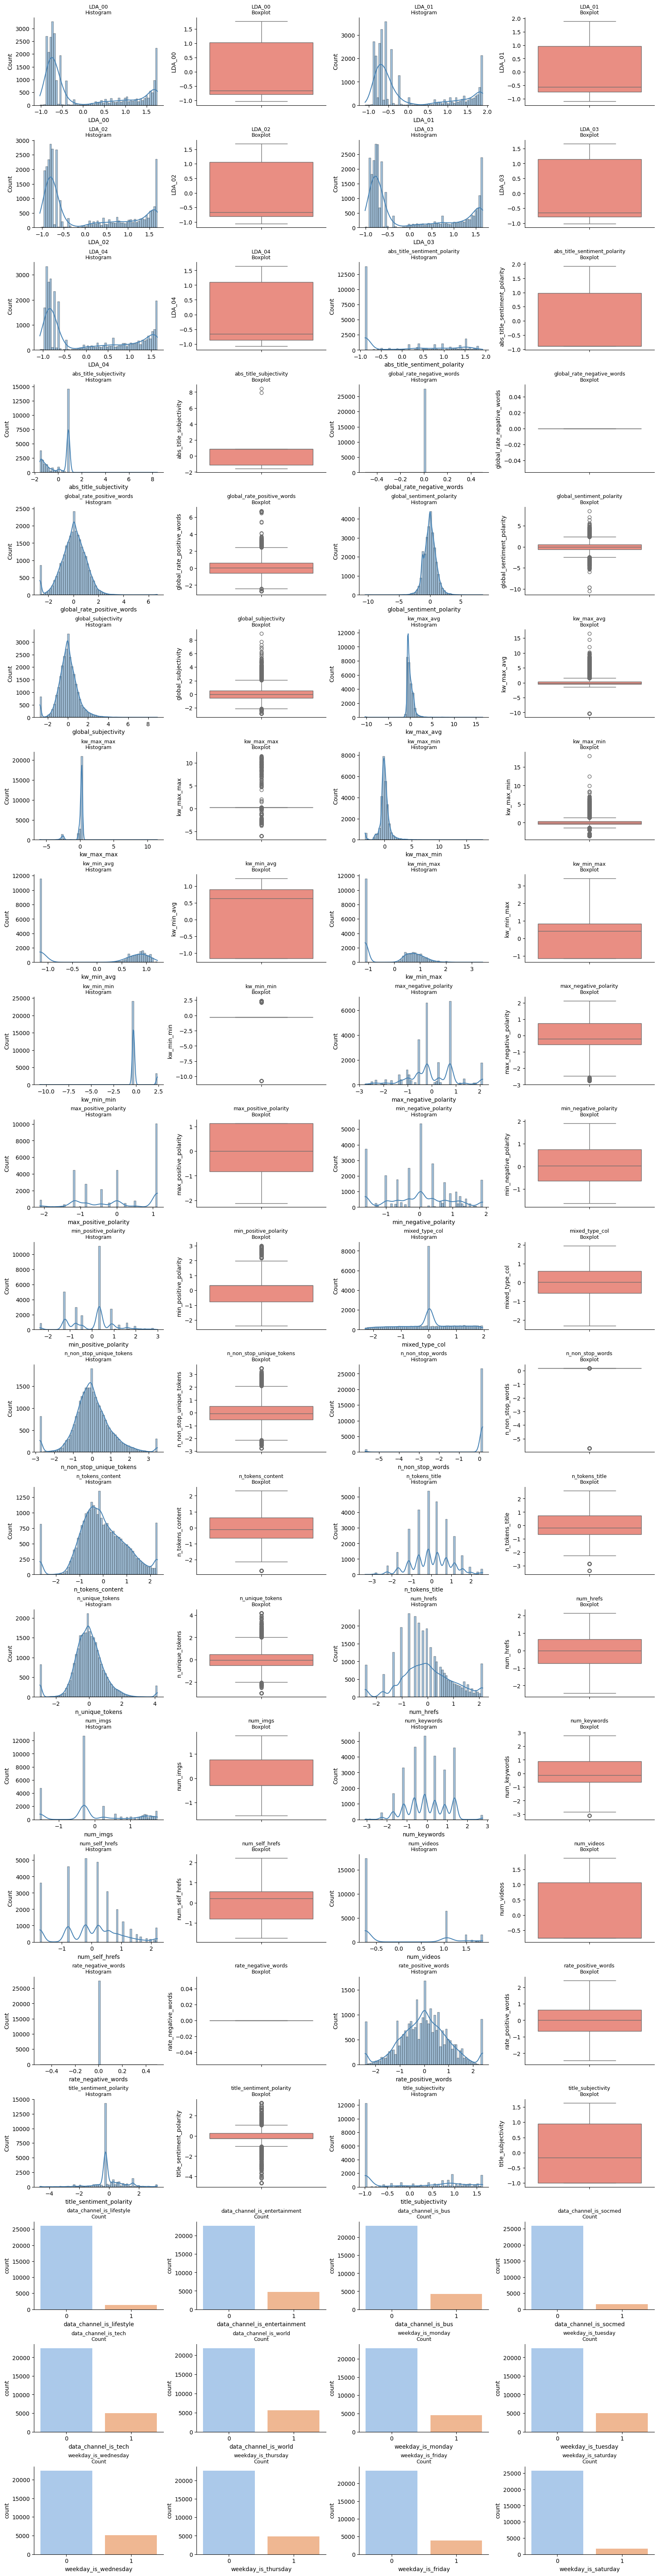

In [47]:
graph_features(df=tmp2,num_columns=num_columns,bool_columns=bool_columns)

### Merge X_train and X_test

In [48]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento
# y prueba en uno nuevo conjunto aumentado que llamaremos trainval:


# ************* Inlcuye aquí tu código:**************************


Xtraintest = pd.concat([X_train,X_test])
ytraintest = pd.concat([y_train,y_test])


# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (33350, 48)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (33350, 48)


#### functions

In [49]:
from sklearn.metrics import make_scorer, mean_squared_error


# Helper: RMSE scorer (scikit-learn does not provide it directly)
rmse_scorer = make_scorer(
    mean_squared_error,
    greater_is_better=False,   # tell sklearn that “bigger is worse”
    squared=False              # √MSE  instead of MSE
)

In [50]:
def mi_fun_nosampling(modelo, nombre, X, y):
    """
    Evaluate a *regression* model (wrapped in a Pipeline with the global
    columnasTransformer) using repeated k-fold CV and several regression
    metrics, then print the aggregated results.

    Parameters
    ----------
    modelo : estimator
        Any scikit-learn compatible regressor (e.g., RandomForestRegressor).
    nombre : str
        A tag that appears in the printed summary.
    X : pd.DataFrame or np.ndarray
        Features.
    y : array-like
        Target vector.
    """

    print('No sampling method used with column transformation, results:')

    pipeline = Pipeline(steps=[
        ('ct', columnasTransformer),
        ('model', modelo)
    ])

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Metrics to compute
    mis_metricas = {
        'rmse' : rmse_scorer,                        # root-mean-squared error
        'mae'  : 'neg_mean_absolute_error',          # will be negated back
        'mape' : 'neg_mean_absolute_percentage_error',
        'r2'   : 'r2'
    }

    scores = cross_validate(
        pipeline,
        X, np.ravel(y),
        scoring=mis_metricas,
        cv=cv,
        return_train_score=True
    )

    # Pretty printing
    print(f'>> {nombre}')
    for metric_name in mis_metricas.keys():
        values = scores[f'test_{metric_name}']
        # flip the sign for “neg_...” scorers so that smaller is worse
        if metric_name in ['mae', 'mape', 'rmse']:
            values = -values
        mean_val = np.nanmean(values)
        std_val  = np.nanstd(values)
        print(f'\t{metric_name:5s}: {mean_val:.4f} ({std_val:.3f})')

    print('------------------------------------------------------------------------------------------')

In [51]:
# ---------------------------------------------------------
def mi_fun_grid(modelo, nombre, X, y, dicc_grid=None):
    """
    Grid-search helper for REGRESSION models.

    Parameters
    ----------
    modelo : estimator
        Any scikit-learn compatible regressor (e.g., XGBRegressor()).
    nombre : str
        Name that appears in the printed summary.
    X : pd.DataFrame or np.ndarray
        Feature matrix.
    y : array-like
        Target vector.
    dicc_grid : dict or list of dicts
        Hyper-parameter grid to explore (as in GridSearchCV).
    """
    print('Find best parameters while using column transformation')

    # 1. Pipeline ----------------------------------------------------
    pipeline = Pipeline(steps=[
        ('ct', columnasTransformer),  # assumes you defined this globally
        ('model', modelo)
    ])

    # 2. Scoring dictionary -----------------------------------------
    mis_metricas = {
        'rmse':  'neg_root_mean_squared_error',      # lower is better
        'mae':   'neg_mean_absolute_error',
        'mape':  'neg_mean_absolute_percentage_error',
        'r2':    'r2'
    }

    # 3. CV strategy -------------------------------------------------
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    # 4. Grid search -------------------------------------------------
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=dicc_grid,
        cv=cv,
        scoring=mis_metricas,
        refit='rmse',           # the model returned by .best_estimator_ minimises RMSE
        n_jobs=-1,
        return_train_score=True,
        verbose=1
    )

    # 5. Fit ---------------------------------------------------------
    grid_result = grid.fit(X, np.ravel(y))

    # 6. Report ------------------------------------------------------
    best_rmse = -grid_result.best_score_   # flip sign back to positive RMSE
    print(f'>> {nombre}')
    print(f'Mejor RMSE (CV): {best_rmse:.4f} usando {grid_result.best_params_}')
    print('------------------------------------------------------------------------------------------')

    # Optional: display the mean CV value for every metric
    for m in mis_metricas:
        vals = grid_result.cv_results_[f'mean_test_{m}']
        stds = grid_result.cv_results_[f'std_test_{m}']
        # flip sign for neg_ scorers
        if m in ['rmse', 'mae', 'mape']:
            vals = -vals
        print(f'{m:5s}: {vals.min():.4f} – {vals.max():.4f}  (std avg {stds.mean():.3f})')
    print('------------------------------------------------------------------------------------------')
    return grid_result 

## ML models

### Regresion lineal

In [52]:
# ===== Celda A: helpers =====
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
import numpy as np

# OJO: esta función debe existir UNA sola vez en todo el notebook
def mi_fun_grid(modelo, nombre, X, y, dicc_grid=None):
    """
    Grid-search helper para MODELOS DE REGRESIÓN.
    Devuelve el objeto GridSearchCV ya entrenado (con .best_estimator_ y .best_score_).
    Requiere que 'columnasTransformer' exista en el notebook.
    """
    print('Find best parameters while using column transformation')

    # pipeline: usa tu columnasTransformer global
    pipeline = Pipeline(steps=[
        ('ct', columnasTransformer),
        ('model', modelo)
    ])

    # métricas
    mis_metricas = {
        'rmse':  'neg_root_mean_squared_error',
        'mae':   'neg_mean_absolute_error',
        'mape':  'neg_mean_absolute_percentage_error',
        'r2':    'r2'
    }

    # validación cruzada
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    # grid search
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=dicc_grid,
        cv=cv,
        scoring=mis_metricas,
        refit='rmse',     # el mejor minimiza RMSE
        n_jobs=-1,
        return_train_score=True,
        verbose=1
    )

    # entrenar
    grid_result = grid.fit(X, np.ravel(y))

    # reporte
    best_rmse = -grid_result.best_score_
    print(f'>> {nombre}')
    print(f'Mejor RMSE (CV): {best_rmse:.4f} usando {grid_result.best_params_}')
    print('------------------------------------------------------------------------------------------')
    for m in mis_metricas:
        vals = grid_result.cv_results_[f'mean_test_{m}']
        stds = grid_result.cv_results_[f'std_test_{m}']
        if m in ['rmse', 'mae', 'mape']:
            vals = -vals
        print(f'{m:5s}: {vals.min():.4f} – {vals.max():.4f}  (std avg {stds.mean():.3f})')
    print('------------------------------------------------------------------------------------------')

    return grid_result  # <--- IMPORTANTE


In [53]:
# ===== Celda B: entrenamiento LR + KNN =====
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Sanidad: verifica que tenemos datos
print("Shapes:",
      "Xtraintest", Xtraintest.shape,
      "| ytraintest", ytraintest.shape,
      "| X_val", X_val.shape,
      "| y_val", y_val.shape)

# --- Regresión Lineal ---
nombre_lr = 'Linear_Regression'
modelo_lr = LinearRegression()
grid_lr = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'model__positive': [False, True],
}
gs_lr = mi_fun_grid(modelo_lr, nombre_lr, Xtraintest, ytraintest, dicc_grid=grid_lr)
best_lr = gs_lr.best_estimator_
best_lr_rmse = -gs_lr.best_score_

# --- KNN Regressor ---
nombre_knn = 'K_neighbors_nearest'
modelo_knn = KNeighborsRegressor()
grid_knn = {
    'model__n_neighbors': [5, 11, 15, 21],
    'model__weights': ['uniform'],
    'model__algorithm': ['auto'],
    'model__p': [1, 2],
}
gs_knn = mi_fun_grid(modelo_knn, nombre_knn, Xtraintest, ytraintest, dicc_grid=grid_knn)
best_knn = gs_knn.best_estimator_
best_knn_rmse = -gs_knn.best_score_

print("\nListo ✅  best_lr y best_knn definidos.")


Shapes: Xtraintest (33350, 48) | ytraintest (33350,) | X_val (5885, 48) | y_val (5885,)
Find best parameters while using column transformation
Fitting 15 folds for each of 8 candidates, totalling 120 fits


>> Linear_Regression
Mejor RMSE (CV): 3974.5696 usando {'model__copy_X': True, 'model__fit_intercept': True, 'model__positive': False}
------------------------------------------------------------------------------------------
rmse : 3974.5696 – 4081.8782  (std avg 90.238)
mae  : 2340.2179 – 2381.9597  (std avg 32.343)
mape : 1.5913 – 1.6280  (std avg 0.325)
r2   : -0.0035 – 0.0486  (std avg 0.006)
------------------------------------------------------------------------------------------
Find best parameters while using column transformation
Fitting 15 folds for each of 8 candidates, totalling 120 fits


>> K_neighbors_nearest
Mejor RMSE (CV): 4014.1910 usando {'model__algorithm': 'auto', 'model__n_neighbors': 21, 'model__p': 1, 'model__weights': 'uniform'}
------------------------------------------------------------------------------------------
rmse : 4014.1910 – 4271.3955  (std avg 91.015)
mae  : 2274.1715 – 2450.0750  (std avg 40.211)
mape : 1.4403 – 1.5850  (std avg 0.330)
r2   : -0.0990 – 0.0295  (std avg 0.010)
------------------------------------------------------------------------------------------

Listo ✅  best_lr y best_knn definidos.


In [54]:
# ===== Celda C: artefactos DVC =====
from pathlib import Path
from joblib import dump
import json, pandas as pd, numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# carpetas de salida
Path("models").mkdir(parents=True, exist_ok=True)
Path("reports/models").mkdir(parents=True, exist_ok=True)

# 1) Guardar modelos entrenados
dump(best_lr,  "models/Linear_Regression.joblib")
dump(best_knn, "models/KNN.joblib")

# 2) Métricas en VALIDACIÓN
def _metricas(nombre, y_true, y_pred):
    rmse_val = float(np.sqrt(mean_squared_error(y_true, y_pred)))  # SIN squared=False
    mae_val  = float(mean_absolute_error(y_true, y_pred))
    r2_val   = float(r2_score(y_true, y_pred))
    return {"model": nombre, "rmse_val": rmse_val, "mae_val": mae_val, "r2_val": r2_val}

artefactos = []
artefactos.append(_metricas("Linear_Regression", y_val, best_lr.predict(X_val)))
artefactos.append(_metricas("KNN",               y_val, best_knn.predict(X_val)))

# 3) CSV resumen
pd.DataFrame(artefactos).to_csv("reports/models/cv_results_summary.csv", index=False)

# 4) JSON con mejor por RMSE
best = min(artefactos, key=lambda d: d["rmse_val"])
with open("reports/models/metrics.json", "w") as f:
    json.dump({"best_model": best["model"], "rmse_val": best["rmse_val"]}, f, indent=2)

print("✅ Artefactos guardados:")
print("- models/Linear_Regression.joblib")
print("- models/KNN.joblib")
print("- reports/models/cv_results_summary.csv")
print("- reports/models/metrics.json")


✅ Artefactos guardados:
- models/Linear_Regression.joblib
- models/KNN.joblib
- reports/models/cv_results_summary.csv
- reports/models/metrics.json


### Decision tree

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#"""class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)"""

# ************* Inlcuye aquí tu código:**************************

#nombre = 'Decision_tree'
#modelo = DecisionTreeRegressor()

#Grid parameters
#dicc_grid = {
    #'model__criterion': ['squared_error', 'absolute_error'],  # loss function
    #'model__splitter': ['best'],        # how to choose splits
    #'model__max_depth': [None, 7, 20],  # tree depth limit
    #'model__min_samples_split': [2, 7, 15],   # minimum samples to split an internal node
    #'model__min_samples_leaf': [1, 2, 6, 10],  # minimum samples at a leaf node
   # 'model__max_features': [None, 'sqrt'],# number of features to consider when looking for best split
    #'model__max_leaf_nodes': [None, 10, 20, 50]  # maximum number of leaf nodes
#}
#Evaluate modelo WITHOUT over/sub sampling and WITH column transformer
#mi_fun_grid(modelo,nombre, Xtraintest, ytraintest,dicc_grid=dicc_grid)
#modelo = DecisionTreeRegressor(criterion='gini',max_depth=3,max_features=25,min_samples_split=3,random_state=1)


#Evaluate modelo WITHOUT over/sub sampling
#mi_fun_nosampling(modelo,nombre, Xtraintest, ytraintest)

Find best parameters while using column transformation
Fitting 15 folds for each of 12 candidates, totalling 180 fits
>> Decision_tree
Mejor RMSE (CV): 23400.2251 usando {'model__criterion': 'absolute_error', 'model__max_depth': 7, 'model__max_features': 'sqrt'}
------------------------------------------------------------------------------------------
rmse : 23400.2251 – 39427.2034  (std avg 5531.391)
mae  : 3138.4086 – 6596.0320  (std avg 385.893)
mape : 0.6508 – 3.4537  (std avg 0.298)
r2   : -2.5399 – -0.0223  (std avg 0.896)

### Random Forest

In [56]:
# Bosque Aleatorio-RandomForest-RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# ************* Inlcuye aquí tu código:**************************

#nombre = 'Random_forest'
#modelo=RandomForestRegressor()

#Grid parameters
#dicc_grid = {
    ##'model__criterion': ['squared_error', 'absolute_error'],
    #'model__max_depth': [None, 15, 30],       # maximum depth of each tree
    #'model__min_samples_split': [2, 5, 10],          # min samples to split an internal node
    #'model__min_samples_leaf': [1, 2, 4],            # min samples at a leaf node
    #'model__max_features': ['sqrt', None],   # number of features considered for split
    #'model__bootstrap': [True, False],               # whether to use bootstrap samples
    #'model__max_leaf_nodes': [None, 20, 50, 100]     # optional, controls model complexity
#}
##Evaluate modelo WITHOUT over/sub sampling and WITH column transformer
#mi_fun_grid(modelo,nombre, Xtraintest, ytraintest,dicc_grid=dicc_grid)
#modelo = RandomForestRegressor(criterion='entropy',max_depth=17,max_features=7,min_samples_split=11,n_estimators=31,random_state=1)


#Evaluate modelo WITHOUT over/sub sampling
#mi_fun_nosampling(modelo,nombre, Xtraintest, ytraintest)

### XGBoosting

In [57]:
# XGBoosting:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
# https://xgboost.readthedocs.io/en/stable/parameter.html


# ************* Inlcuye aquí tu código:**************************

#nombre = 'Extreme_Gradient_Boost'
#modelo=XGBRegressor()

#Grid parameters
#dicc_grid =  {
    # Tree complexity
    #'model__n_estimators': [50, 100, 5¿200],        # number of boosting rounds
    #'model__max_depth': [3, 10, 20],             # tree depth
    #'model__min_child_weight': [1, 3, 5],          # min sum of instance weight (controls overfitting)

    # Learning dynamics
    #'model__learning_rate': [0.01, 0.05, 0.1, 0.3], # shrinkage step
    #'model__subsample': [0.6, 0.8, 1.0],            # row sampling
    #'model__colsample_bytree': [0.6, 0.8, 1.0],     # feature sampling per tree

    # Regularization
    #'model__gamma': [0, 0.1, 0.3, 0.5],             # minimum loss reduction to make a split
    #'model__reg_alpha': [0, 0.1, 0.5, 1.0],         # L1 regularization
    #'model__reg_lambda': [0.5, 1.0, 2.0]            # L2 regularization
#}
#Evaluate modelo WITHOUT over/sub sampling and WITH column transformer,
#mi_fun_grid(modelo,nombre, Xtraintest, ytraintest,dicc_grid=dicc_grid)
#modelo=XGBRegressor(booster='gbtree',n_estimators=30,learning_rate=0.2,max_depth=3,max_depth=3,subsample=0.8,random_state=1)


#Evaluate modelo WITHOUT over/sub sampling
#mi_fun_nosampling(modelo,nombre, Xtraintest, ytraintest)

### Neuronal network MLP

### Support vector machine SVM

In [58]:
# Red neuronal de Perceptrón Multicapa-MLP:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


# ************* Inlcuye aquí tu código:**************************

#nombre = "Red Neuronal Multicapa MLP"
#modelo = MLPRegressor()


#Grid parameters
#dicc_grid = {
    # Network architecture
    #'model__hidden_layer_sizes': [
    #    (50,), (100,), (100, 50), (50, 50, 50)
    #],  # number of layers and neurons per layer

    # Activation and solver
    #'model__activation': ['relu', 'tanh', 'logistic'],   # nonlinearities
    #'model__solver': ['adam', 'lbfgs'],                  # optimizer

    # Regularization and learning
    #'model__alpha': [0.0001, 0.001, 0.01],              # L2 penalty
    #'model__learning_rate': ['constant', 'adaptive'],    # learning rate schedule
    #'model__learning_rate_init': [0.001, 0.01, 0.05],    # initial learning rate
   # 'model__early_stopping': [True]                      # helps avoid overfitting
#}
#Evaluate modelo WITHOUT over/sub sampling and WITH column transformer
#mi_fun_grid(modelo,nombre, Xtraintest, ytraintest,dicc_grid=dicc_grid)
#modelo = MLPRegressor(hidden_layer_sizes=(75,),activation='tanh',solver='adam',learning_rate='constant',learning_rate_init=0.0001,max_iter=2000,random_state=1)

# Selecciona el método de submuestreo o sobremuestreo, si lo deseas incluir.
#metodo_uo = SMOTETomek(random_state=1)

#Evaluate modelo WITHOUT over/sub sampling
#mi_fun_nosampling(modelo,nombre, Xtraintest, ytraintest)

In [59]:
# Máquina de Vectores de Soporte-SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# ************* Inlcuye aquí tu código:**************************

#nombre = 'Support Vector Machine SVM'
#modelo = SVR()

#Grid parameters
#dicc_grid =  {
    #'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'model__C': [0.1, 1, 10, 100],          # regularization parameter
    #'model__epsilon': [0.01, 0.1, 0.2, 0.5],# insensitive loss margin
    #'model__gamma': ['scale', 'auto'],      # kernel coefficient
    #'model__degree': [2, 3, 4]              # only used for 'poly' kernel
#}
#Evaluate modelo WITHOUT over/sub sampling and WITH column transformer
#mi_fun_grid(modelo,nombre, Xtraintest, ytraintest,dicc_grid=dicc_grid)
#modelo = SVR(C=3.25,kernel='rbf',gamma='scale',random_state=1)


#Evaluate modelo WITHOUT over/sub sampling
#mi_fun_nosampling(modelo,nombre, Xtraintest, ytraintest)
